# Sklearn statistical machine learning

Some examples from [this book](https://jakevdp.github.io/PythonDataScienceHandbook/index.html). Some from sklearn documentation

## Train test split, Standardize (columns) and normalize (rows)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
n = 10000
p = 40
rng = np.random.RandomState(8888)
x_mat = rng.normal(size=(n,p))
beta_true = rng.normal(size = p)
y = np.dot(x_mat,beta_true) + rng.normal(size=n)

(array([  22.,  158.,  658., 1704., 2741., 2637., 1465.,  505.,   89.,
          21.]),
 array([-21.44136517, -17.06860753, -12.69584989,  -8.32309224,
         -3.9503346 ,   0.42242304,   4.79518068,   9.16793833,
         13.54069597,  17.91345361,  22.28621125]),
 <BarContainer object of 10 artists>)

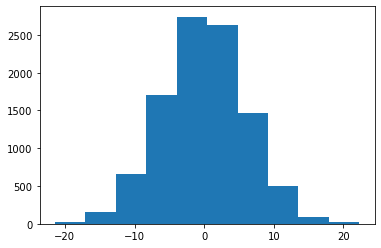

In [3]:
plt.hist(y)

In [4]:
## make random class
z = np.zeros_like(y)
z[y>10] = 3
z[y<-10] = 2

`train_test_split`: __`stratify`__: classification label

In [5]:
tr_X, ts_X, tr_Y, ts_Y = train_test_split(x_mat,y,test_size=0.2,random_state =0)

In [6]:
tr_X, ts_X, tr_z, ts_z = train_test_split(x_mat,z,test_size=0.2,random_state =0,stratify=z)

In [7]:
print(sum(tr_z==3)/len(tr_z),sum(ts_z==3)/len(ts_z))

0.0465 0.0465


In [8]:
print(sum(tr_z==2)/len(tr_z),sum(ts_z==2)/len(ts_z))

0.048625 0.0485


In [9]:
print(sum(tr_z==0)/len(tr_z),sum(ts_z==0)/len(ts_z))

0.904875 0.905


#### `StandardScaler` defaults `with_mean=True` and  `with_std=True` can be adjusted

In [67]:
standardizer = StandardScaler().fit(tr_X)
tr_X = standardizer.transform(tr_X)
ts_X = standardizer.transform(ts_X)

In [68]:
tr_X.mean(axis=0)

array([-2.57576079e-17,  3.62487818e-17,  3.78239107e-17, -1.78329573e-18,
       -1.99840144e-18, -2.88380431e-17, -6.97497615e-17, -3.85247390e-17,
       -8.18789481e-18,  3.36952688e-17,  8.84015083e-18,  7.82728916e-17,
       -3.38062911e-17, -3.20021787e-17, -3.61516372e-18, -1.12132525e-17,
        2.85604873e-17, -3.18911564e-17,  1.92484917e-17,  2.15938378e-17,
       -5.09314813e-17, -2.77555756e-19, -3.46944695e-18, -4.95298247e-17,
        7.60502772e-18, -1.37390099e-17, -2.04974926e-17, -1.00336406e-17,
        3.06005221e-18, -1.61988478e-17,  8.38218384e-18,  4.79200013e-17,
       -2.23709939e-17,  6.65023592e-17, -2.62984079e-17, -2.89490654e-17,
        2.68396416e-17,  2.70616862e-17, -1.72570291e-17,  3.37299633e-17])

In [69]:
tr_X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

#### `Normalizer` default is `l2`, `l1` and `max` are available

In [70]:
normalizer = Normalizer().fit(tr_X)
tr_X_norm = normalizer.transform(tr_X)
ts_X_norm = normalizer.transform(ts_X)

In [79]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

In [80]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

## Naive Bayes

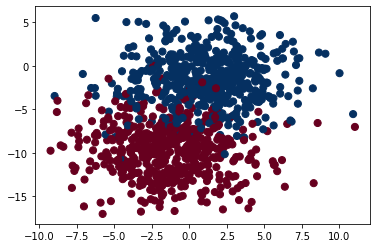

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, 2, centers=2, random_state=2, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

### `Gaussian`, `multinomial` and `Categorical`. `Complement Naive Bayes` is for imblanced `multinomial`. Except for `Gaussian`, the rest are for counts data, popular in text classification and simple NLP.

__Recall the multinomial distribution is when there are multiple identical independent trials where each trial has k possible outcomes. The categorical distribution is when there is only one such trial.__

__We can also add our prior__

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
tr_X, ts_X, tr_Y, ts_Y = train_test_split(X,y,test_size=0.2,random_state =0)
model.fit(tr_X, tr_Y)
predicted_y = model.predict(ts_X);

In [26]:
predict_proba =  model.predict_proba(ts_X);

### Classification results: `classification_report` and `confusion_matrix`

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ts_Y,predicted_y)

#### true is y-axis and predicted is x-axis

In [28]:
mat

array([[107,   2],
       [  9,  82]], dtype=int64)

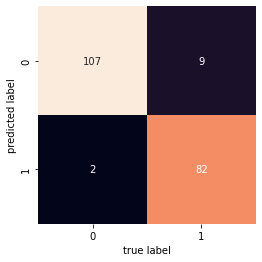

In [29]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
print(classification_report(predicted_y, ts_Y))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      0.99        90

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [35]:
?metrics.roc_curve

Signature:
metrics.roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : ndarray of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : ndarray of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,)

In [87]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ts_Y, predict_proba[:,0],pos_label = 0)
auc_results = auc(fpr, tpr)

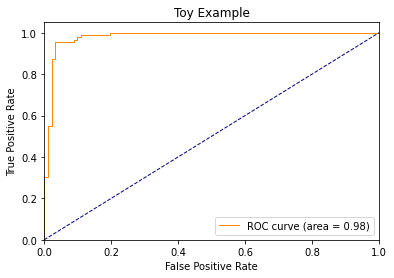

In [105]:
plt.figure()
lw = 1
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f'ROC curve (area = {np.round(auc_results,2)})',
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Toy Example")
plt.legend(loc="lower right")
plt.show()

#### manual calculation of AUC

__trapezoidal approach__

In [102]:
sum((fpr[1:n_fpr] - fpr[:n_fpr-1]) * ( tpr[1:n_fpr] + tpr[:n_fpr-1]) /2)

0.9820546426051013

### `AdaBoost`

In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
X, y = make_regression(n_samples=1000, n_features=50, n_informative=10,noise= 2,
                      random_state=0, shuffle=False)

In [74]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size = 0.2, random_state= 8888)

In [81]:
params_grid = {'alpha': np.logspace(-6,6,20),'l1_ratio': np.linspace(0,1,11)}

In [91]:
en_model = ElasticNet()
en_model_grid = GridSearchCV(model,param_grid = params_grid,cv=5, n_jobs=-1)
en_model_grid.fit(X_tr,Y_tr)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [92]:
en_model_grid.best_estimator_

ElasticNet(alpha=0.11288378916846883, l1_ratio=1.0)

In [93]:
en_model_best_mse = mean_squared_error(en_model_grid.best_estimator_.predict(X_ts),Y_ts)
en_model_best_mse

4.490568825516849

In [94]:
np.arange(50,501,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [168]:
params_grid_boost = {'learning_rate':np.linspace(1,5,10), 'n_estimators':np.arange(2,20,1),'loss':["linear", "square", "exponential"]} 

In [173]:
base_model = en_model_grid.best_estimator_
adboost_regr = AdaBoostRegressor(base_estimator = base_model,random_state=0)
ada_grid = GridSearchCV(adboost_regr,param_grid = params_grid_boost,cv=5, n_jobs=-1)
ada_grid.fit(X_tr,Y_tr)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.11288378916846883,
                                                                   l1_ratio=1.0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [174]:
ada_grid.best_estimator_

AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.11288378916846883,
                                            l1_ratio=1.0),
                  loss='exponential', n_estimators=4, random_state=0)

In [175]:
ada_en_model_best_mse = mean_squared_error(ada_grid.best_estimator_.predict(X_ts),Y_ts)
ada_en_model_best_mse

4.41862800471854

In [176]:
np.round((en_model_best_mse - ada_en_model_best_mse )/en_model_best_mse * 100,2)

1.6

### SVM

- The linear (vanilla) kernel tends to work on very high dimensional data that are very sparse like the kind that arises in text mining and text classification
- The polynomial kernel has been known to perform very well on image processing tasks
- The Spline and ANOVA kernels have been found to perform typially well on regression tasks
- The Gaussian RBF kernel and the Laplace RBF kernel seem to be the default kernels of choice when there is limited prior knowledge about the data. This is probably due to the fact they are more general andwill help model arbitrarily complex problem just by changing the bandwidth.
- The hyperbolic tangent (sigmoid) kernel reminds us of articial neural networks

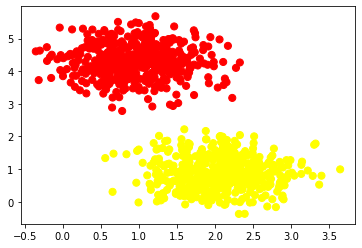

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

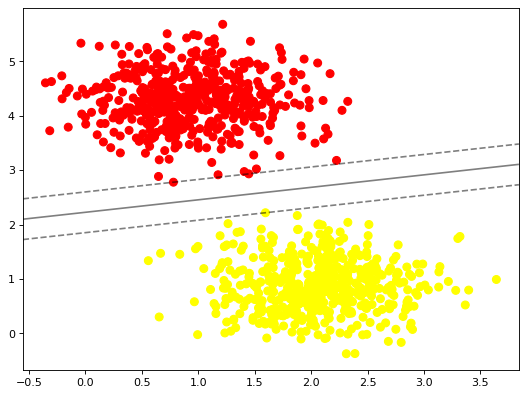

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [16]:
model.support_vectors_

array([[0.78007558, 2.7807158 ],
       [1.44779312, 2.93394874],
       [1.59544218, 2.21913152]])

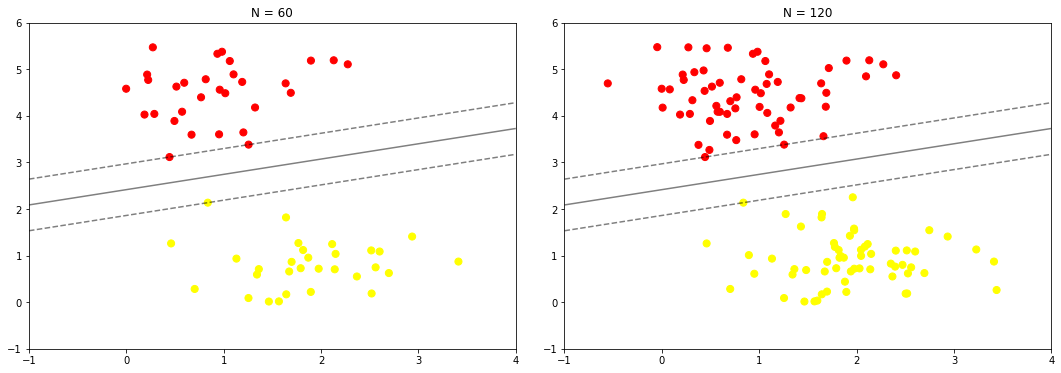

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [19]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

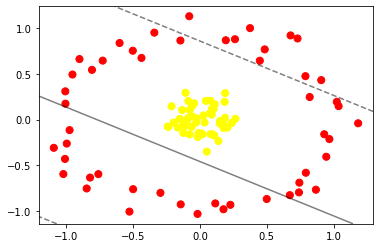

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

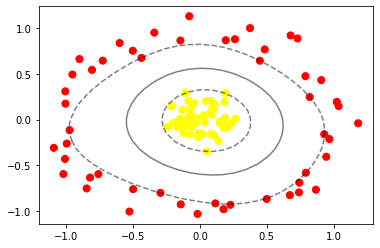

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [23]:
## dashed line
clf.support_vectors_

array([[ 0.11444398, -0.91791858],
       [-0.97655353, -0.1146482 ],
       [ 0.82122403,  0.24779531],
       [-0.29623943, -0.80227277],
       [ 0.79242869, -0.58189677],
       [ 0.44785143,  0.64571675],
       [ 0.93028005, -0.15996558],
       [-0.43814741,  0.67616034],
       [ 0.18806949,  0.29116937],
       [-0.10831575,  0.29434467],
       [ 0.05097163, -0.35078239]])

## SVM Summary
- The scaling with the number of samples N is $O[N^3]$ at worst, or $O[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.

### Principal Component Regression vs Partial Least Squares Regression

PCR is a regressor composed of two steps: first, PCA is applied to the training data, possibly performing dimensionality reduction; then, a regressor (e.g. a linear regressor) is trained on the transformed samples. In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. As a result, PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance. __Indeed, the dimensionality reduction of PCA projects the data into a lower dimensional space where the variance of the projected data is greedily maximized along each axis. Despite them having the most predictive power on the target, the directions with a lower variance will be dropped, and the final regressor will not be able to leverage them.__

PLS is both a transformer and a regressor, and it is quite similar to PCR: it also applies a dimensionality reduction to the samples before applying a linear regressor to the transformed data. __The main difference with PCR is that the PLS transformation is supervised__. Therefore, as we will see in this example, it does not suffer from the issue we just mentioned.

__While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data. To address such limitation, manifold learning such as multidimensional scaling (MDS), locally linear embedding (LLE), and isometric mapping (IsoMap) as well as more recent development of auto-encoder could be used.__

PLS :

$ X = TP^T + E $ \
$ Y = UQ^T + F $

where X is $N \times M$ predictors, Y is $N \times P$ responses; T and U are $N \times L$ matrices that are, respectively, projections of X (the X score, component or factor matrix) and projections of Y (the Y scores); P and Q are, respectively, $M \times L$ and $P \times L$ orthogonal loading matrices; and matrices E and F are the error terms, assumed to be independent and identically distributed random normal variables. __The decompositions of X and Y are made so as to maximise the covariance between T and U.__

Canonical correlation analysis and PLS look very similar, in particular, the equivalence relationship between CCA and orthonormalized partial least squares (OPLS) can be established. (see below paper)

"On the Equivalence Between Canonical Correlation Analysis and Orthonormalized Partial Least Squares"

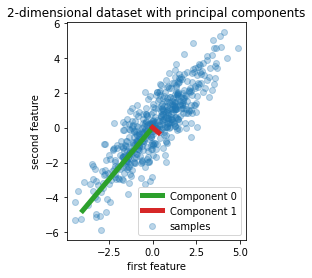

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


In [84]:
pca.components_

array([[-0.64402153, -0.76500736],
       [ 0.76500736, -0.64402153]])

In [85]:
pca.components_

array([[-0.64402153, -0.76500736],
       [ 0.76500736, -0.64402153]])

In [86]:
pca.explained_variance_ratio_

array([0.93113934, 0.06886066])

In [87]:
pca.components_[1]

array([ 0.76500736, -0.64402153])

#### large variance direction is the first, but second dimension with lower variance hold higher predictive power

In [88]:
X[:5,:5]

array([[-3.12306216, -3.26740225],
       [-2.77595836, -0.929101  ],
       [-2.58241628, -4.07234479],
       [-1.49245333, -1.92036067],
       [-0.04152868,  0.38116552]])

In [89]:
pca.components_

array([[-0.64402153, -0.76500736],
       [ 0.76500736, -0.64402153]])

In [90]:
X.dot(pca.components_)[:5,:5]

array([[-0.4882675 ,  4.49344295],
       [ 1.07700785,  2.72198963],
       [-1.45224205,  4.5982452 ],
       [-0.50791797,  2.37849141],
       [ 0.31833979, -0.21370906]])

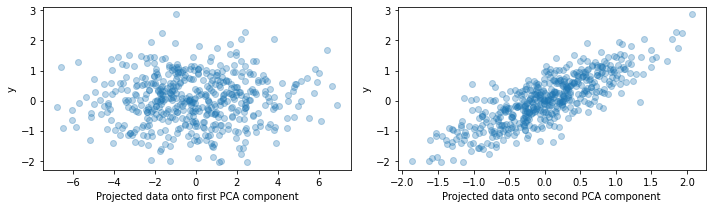

In [56]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

## if we change n_components = 2, we will have same result
n_comp = 1
pcr = make_pipeline(StandardScaler(), PCA(n_components=n_comp), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=n_comp)
pls.fit(X_train, y_train)

# fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
# axes[0].scatter(
#     pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
# )
# axes[0].set(
#     xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
# )
# axes[0].legend()
# axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
# axes[1].scatter(
#     pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
# )
# axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
# axes[1].legend()
# plt.tight_layout()
# plt.show()

PLSRegression(n_components=1)

In [77]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.003
PLS r-squared 0.559


In [75]:
print(pca.components_) ## wrong?

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [60]:
print(pca.explained_variance_ratio_)

[0.93018958]


#### Clustering analysis (unsupervised)
Recall kNN is supervised and K-means is unspervised, stupid names!

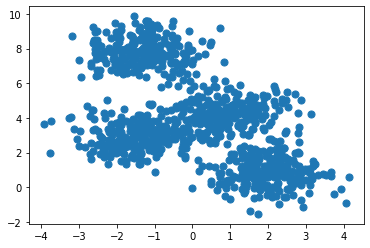

In [107]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [108]:
from sklearn.cluster import KMeans
X_tr,X_ts,Y_tr,Y_ts = train_test_split(X,y_true,test_size = 0.2, random_state=0)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_tr)
y_kmeans = kmeans.predict(X_ts)

In [110]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score
adjusted_rand_score(y_kmeans,Y_ts)

0.8960312257105201

In [111]:
adjusted_mutual_info_score(y_kmeans,Y_ts)

0.873840445938267

#### Hand-code Kmeans

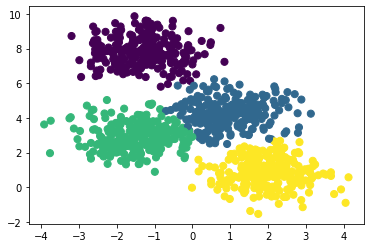

In [164]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters,iter_max=10000, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    #i = rng.permutation(X.shape[0])[:n_clusters]
    i = np.random.choice(X.shape[0],5)
    centers = X[i]
    kobe = 0 
    while True | kobe<=iter_max:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.array_equal(centers,new_centers):
            break
        centers = new_centers
        kobe +=1
    
    return centers, labels

centers, labels = find_clusters(X,4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [163]:
adjusted_rand_score(labels,y_true)

0.9351708245216435

In [2]:
x = [1,3,5]
x.pop()
x

[1, 3]

#### k-means is limited to linear cluster boundaries

__K-means minimizes within-cluster variance. Now if you look at the definition of variance, it is identical to the sum of squared Euclidean distances from the center. We can't use other distance either unlike in supervised KNN because k-means may stop converging with other distance functions. However, `K-medians` which used Manhatten distance is viable as well.__

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. 

A solution is to use kernelized k-means `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. This solution is similar to the kernel trick in `SVM`.

In [167]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

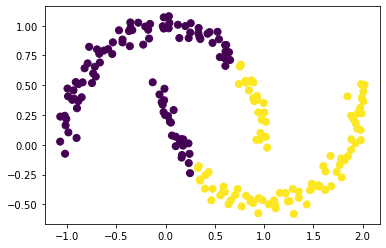

In [168]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

C:\Users\josep\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


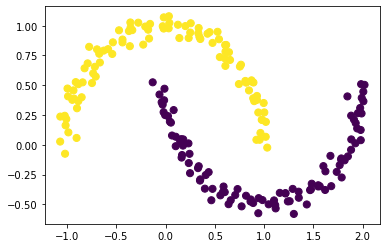

In [169]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This is the idea behind batch-based k-means algorithms, one form of which is implemented in `sklearn.cluster.MiniBatchKMeans`. 

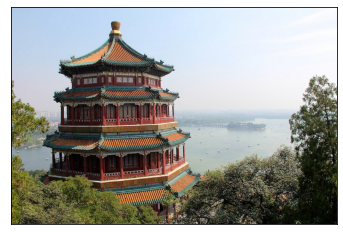

In [183]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [184]:
china.shape

(427, 640, 3)

In [185]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [188]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16,batch_size = 4096)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

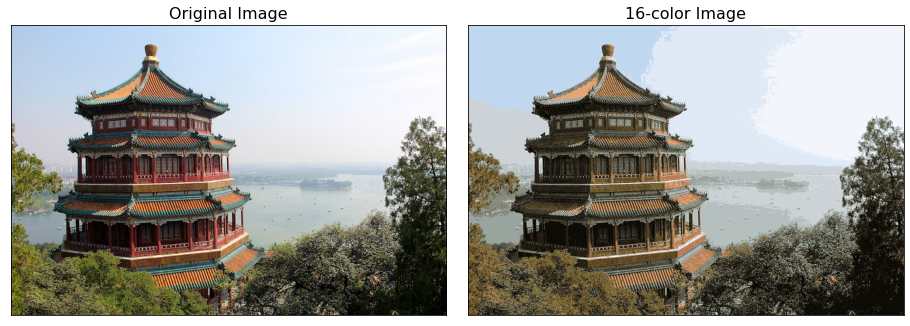

In [189]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## Mixtures of Gaussians

__The K-means algorithm turns out to be a special case of clustering with a mixture of Gaussians where all variances are equal (and covariances are 0 and mixture weights are equal): the underlying assumption is that clusters are essentially spherical. This assumption is clearly suboptimal for many situations. GMM provides more flexible as well as uncertain quantification to address the shortcomings of K-means__



In [218]:
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))       

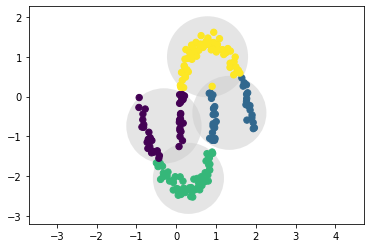

In [220]:
rng = np.random.RandomState(20)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

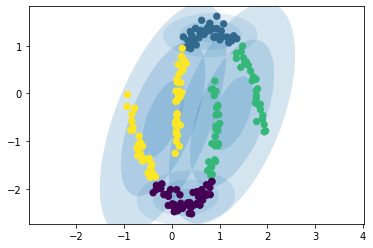

In [221]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

#### GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments

In [222]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.001 0.469 0.53 ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


___covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
    String describing the type of covariance parameters to use.
    Must be one of___:

    'full'
        each component has its own general covariance matrix
    'tied'
        all components share the same general covariance matrix
    'diag'
        each component has its own diagonal covariance matrix
    'spherical'
        each component has its own single variance

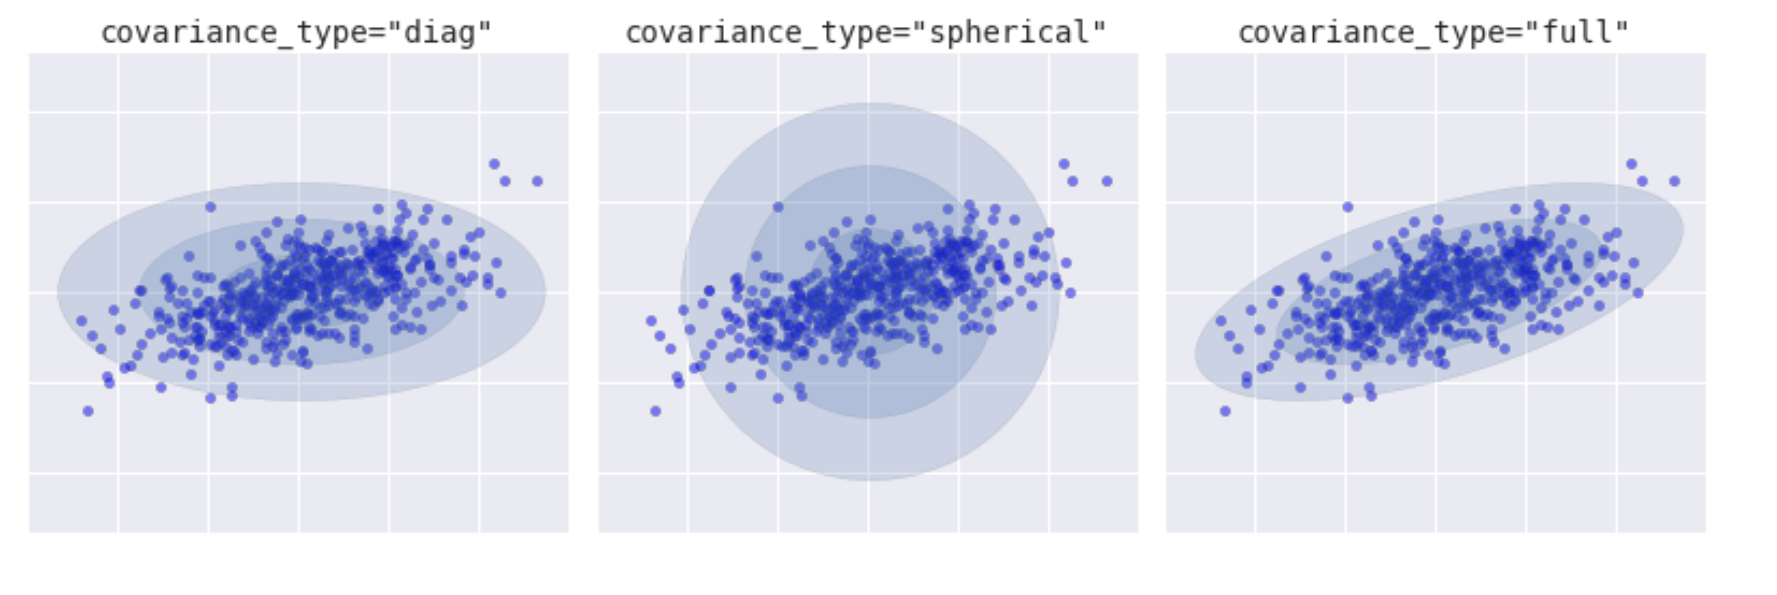

In [244]:
from IPython import display
display.Image("./images/covariance_type.png")

### GMM as density estimation

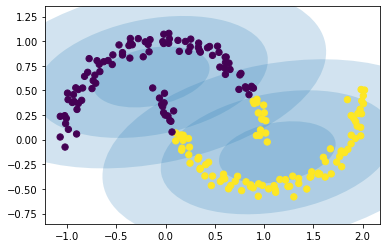

In [226]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, X)

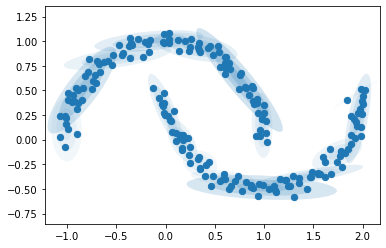

In [228]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X, label=False)

We can generate samples from this density estimator

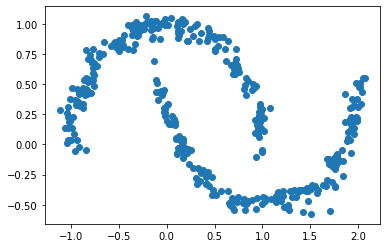

In [238]:
Xnew = gmm16.sample(400,)[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

__Using `AIC` and `BIC` to perform select number of components__

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


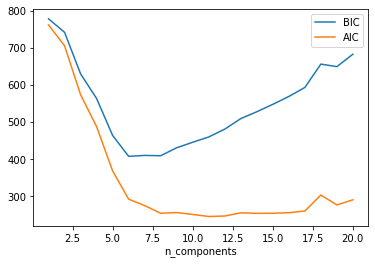

In [241]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

__`silhouette_score`__

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

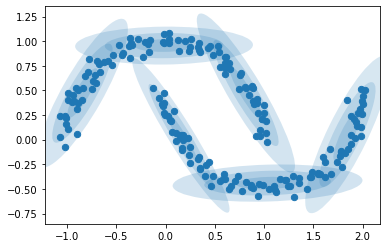

In [242]:
gmm6 = GMM(n_components=6, covariance_type='full', random_state=0)
plot_gmm(gmm6, X, label=False)

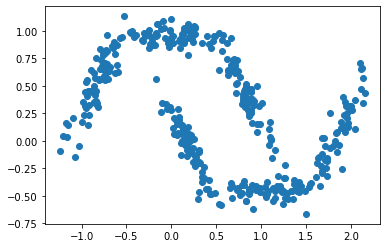

In [243]:
Xnew6 = gmm6.sample(400,)[0]
plt.scatter(Xnew6[:, 0], Xnew6[:, 1]);

### K-nearest neighbour (KNN)

Recall there is no training step, only prediction. It's supervised and don't confuse it with the K-means clustering, which is unsupervised.

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points
    1. Calculate the distance between test data and each row of training data.
    2. Sort the calculated distances in ascending order based on distance values
    3. Get top k rows from the sorted array
    4. Get the most frequent class of these rows
    5. Return the predicted class
    
__When a tiebraker happens (for example., 2 classes, 4 nearest neighbour, 2 predicted 0 and 2 predicted 1.), sklearn uses the lowest class asignment's value, matlab has random or 
use the predicted class of the obs with smallest distance.__

### linear regression standardization of X

In [33]:
((y-y.mean())/y.std())[:,None].shape

(1000, 1)

In [36]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_informative=2,noise= 2,
                      random_state=0, shuffle=False)
X2 = StandardScaler().fit(data.iloc[:,:2]).transform(data.iloc[:,:2])
data = pd.DataFrame(np.concatenate((X,y[:,None]),axis=1),columns = ["x1","x2","y"])
data2 = pd.DataFrame(np.concatenate((X2,y[:,None],((y-y.mean())/y.std())[:,None]),axis=1),columns = ["x1","x2","y",'y_stand'])

In [37]:
import statsmodels.formula.api as smf
smf.ols("y ~ x1+x2", data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0903,0.060,-1.497,0.135,-0.209,0.028
x1,40.1374,0.062,648.647,0.000,40.016,40.259
x2,41.0371,0.061,668.189,0.000,40.917,41.158


In [38]:
import statsmodels.formula.api as smf
smf.ols("y ~ x1+x2", data=data2).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.3692,0.060,-22.710,0.000,-1.487,-1.251
x1,39.1093,0.060,648.647,0.000,38.991,39.228
x2,40.2875,0.060,668.189,0.000,40.169,40.406


__Standardization of design matrix will make the mean go through the mean of y__

b0 = Y_bar - X_bar * beta_hat 

if X is standardized, E(X_bar) = 0 and b0 = Y_bar \
if both X and Y is standardized, it goes through 0 since E(Y_bar) = 0

In [39]:
y.mean() 

-1.3691537685544979

In [40]:
smf.ols("y_stand ~ x1+x2", data=data2).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.475e-17,0.001,-1.36e-14,1.000,-0.002,0.002
x1,0.7010,0.001,648.647,0.000,0.699,0.703
x2,0.7221,0.001,668.189,0.000,0.720,0.724


### alternative to one-hot encoding
https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809

## Feature hashing

Since a simple modulo is used to transform the hash function to a column index, it is advisable to use a power of two as the n_features parameter; otherwise the features will not be mapped evenly to the columns.

In [10]:
from sklearn.feature_extraction import FeatureHasher
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
for i in [2,4,16]:
    h = FeatureHasher(n_features=i)
    f = h.transform(D)
    print(f.toarray())

[[-4.  1.]
 [-5. -2.]]
[[ 0. -1. -4.  2.]
 [-5. -2.  0.  0.]]
[[ 0.  0.  0.  0.  0. -1.  0.  2.  0.  0.  0.  0.  0.  0. -4.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0. -5.  0.  0.  0.  0.  0.  0.  0.]]


## Hand Coding Practice of Kmeans, K-nearest neighbour, Logistic regression, FPR, TPR, ROC

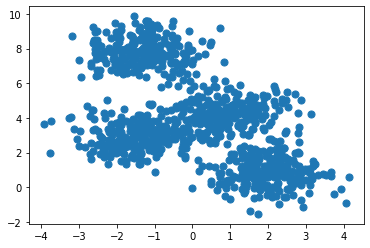

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
from sklearn.metrics import pairwise_distances_argmin
def Kmeans_manual(X, K=4, max_iter = 10000):
    center = X[np.random.choice(len(X),size = 4)]
    counter = 0
    while True or counter <= max_iter:
        ## pairwise_distances_argmin does the following two lines
        dist_mat = np.sum((center[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
        cluster_assignment = dist_mat.argmin(axis=0)
        #cluster_assignment = pairwise_distances_argmin(X, center)
        new_centers = np.array([X[cluster_assignment ==i].mean(axis=0) for i in range(K)]) 
        if np.array_equal(new_centers,center):
            break
        center = new_centers
        counter +=1
    return new_centers, cluster_assignment

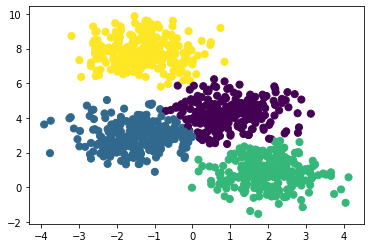

In [20]:
centers, labels = Kmeans_manual(X,4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y_true,test_size = 0.2, random_state = 0)

In [76]:
def Knearest_neighbor(K, x_tr, x_ts, y_tr):
    dist_mat = np.sum((x_ts[:,None,:] - x_tr[None,:,:])**2, axis=-1)
    ## K+1 because the closest point is the point itself
    K_nearest = np.argpartition(dist_mat, K + 1, axis=1)
    print(K_nearest.shape)
    labels = y_train[K_nearest[:,1:(K+1)].reshape(-1)].reshape(len(x_ts),K)
    return np.array([np.bincount(x).argmax() for x in labels])

In [77]:
kn_predicted = Knearest_neighbor(4, x_train, x_test, y_train)

(200, 800)


In [79]:
print(classification_report(kn_predicted, y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.98      0.98      0.98        51
           2       0.94      0.96      0.95        47
           3       1.00      1.00      1.00        57

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)
## k nearest has bad probability
predicted_prob = neigh.predict_proba(x_test)

In [93]:
predicted_prob[:10]

array([[0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.  , 0.75, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ]])

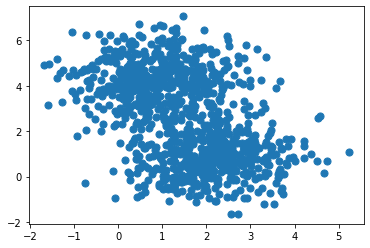

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=2,
                       cluster_std=1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y_true,test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
y_predicted = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

In [9]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.95      0.92      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [10]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_predicted), recall_score(y_test,y_predicted)

(0.9223300970873787, 0.95)

In [11]:
precision = sum(y_test[np.where(y_predicted == 1)])/sum(y_predicted)
recall = sum(y_predicted[np.where(y_test == 1)])/sum(y_test)
precision, recall

(0.9223300970873787, 0.95)

In [12]:
y_pred_prob.shape

(200, 2)

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1],pos_label = 1)
auc_results = auc(fpr, tpr)
auc_results

0.9864

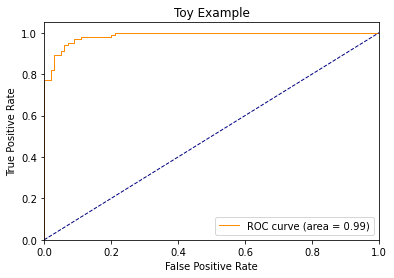

In [14]:
plt.figure()
lw = 1
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f'ROC curve (area = {np.round(auc_results,2)})',
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Toy Example")
plt.legend(loc="lower right")
plt.show()

__Important! Tripozoidal approach needs to make sure `TPR` and `FPR` are soreted, we could also use the reversed the loop to obtain natural ordering__

In [40]:
n = 101
grid = np.linspace(0,1,n)
tpr = np.array([])
fpr = np.array([])
tp = sum(y_test)
true_index = np.where(y_test==1)
tn = len(y_test)-tp
false_index = np.where(y_test==0)
for db in reversed(grid):
    label = y_pred_prob[:,1] > db
    tpr = np.append(tpr,sum(label[true_index])/tp)
    fpr = np.append(fpr,sum(label[false_index])/tn)

In [41]:
auc = sum((tpr[0:(n-1)] + tpr[1:n]) * ( fpr[1:n] - fpr[0:(n-1)])/2)
auc

0.98645